# **Instalações e Bibliotecas**

In [ ]:
%%capture

!pip install shap
!pip install optuna

In [ ]:
import pandas as pd
import numpy as np

from sklearn.impute import KNNImputer

# **Funções**

O arquivo 'functions_pred_cruzada' contém as funções que serão utilizadas para selecionar, pré-processar e treinar e validar os modelos de machine learning

In [ ]:
!pip install --upgrade --no-cache-dir gdown
!gdown 1uVoArwRTJmvbyFLyFniwFvWGHMfiNIWO --quiet

from functions_pred_cruzada import *

# **Dados**

In [ ]:
# Dados brutos com todos os tipos de câncer
!gdown 1AaEC5jTcInC2fwbVG7BW3BeJfXq5OBlO --quiet

df_geral = pd.read_csv('pacigeral_12_23.csv')
print(df_geral.shape)
df_geral.head(3)

<ipython-input-5-04168a9f1961>:4: DtypeWarning: Columns (23,24,25,32,36,37,73,74,75,78,89,90,91) have mixed types. Specify dtype option on import or set low_memory=False.
  df_geral = pd.read_csv('pacigeral_12_23.csv')


(1178688, 100)


,ESCOLARI,IDADE,SEXO,UFNASC,UFRESID,IBGE,CIDADE,CATEATEND,DTCONSULT,CLINICA,...,REC03,REC04,IBGEATEN,CIDO,DSCCIDO,HABILIT,HABIT11,HABILIT1,HABILIT2,CIDADEH
0,4,17,2,SP,SP,3538709,PIRACICABA,9,2011-06-21,24,...,NaN,NaN,3538709,80003,NEOPLASIA MALIGNA,9,UNACON com Serviços de Radioterapia e de Hemat...,1,1,Piracicaba
1,9,1,2,SP,SP,3535507,PARAGUACU PAULISTA,9,2005-02-25,3,...,NaN,NaN,3506003,80003,NEOPLASIA MALIGNA,14,Inativo,6,5,Bauru
2,9,18,2,SP,SP,3548500,SANTOS,9,2012-05-14,24,...,NaN,NaN,3548500,80003,NEOPLASIA MALIGNA,2,UNACON com Serviço de Radioterapia,1,1,Santos


**Tipos com maior incidência**

In [ ]:
df_geral.TOPOGRUP.value_counts(normalize=True).head(15)

C44    0.228854
C50    0.136985
C61    0.103433
C34    0.047110
C53    0.046320
C18    0.038405
C42    0.037690
C16    0.036604
C20    0.029200
C73    0.023743
C77    0.018551
C15    0.018082
C67    0.017893
C64    0.015958
C32    0.015779
Name: TOPOGRUP, dtype: float64

*   C44 - Pele 22,88%
*   C50 - Mama 13,7%
*   C61 - Próstata 10,34%
*   C34 - Pulmão 4,71%
*   C53 - Colo de Útero 4,63%
*   C18 - Cólon 3,84%
*   C42 - ?? 3,77%
*   C16 - Estômago 3,66%
*   C20 - Reto 2,92%
*   C73 - Tiróide 2,37%
*   C77 - ?? 1,85%
*   C15 - Esôfago 1,81%
*   C67 - Bexiga 1,79%
*   C64 - Rim 1,59%
*   C32 - Laringe 1,58%



## **Sistema Digestório**

* Cavidade Oral (C00, C01, C02, C03, C04, C05, C06)

In [ ]:
boca = ['C00', 'C01', 'C02', 'C03', 'C04', 'C05', 'C06']

df_boca = data_prep(df_geral, boca)
print(df_boca.shape)
df_boca.head(3)

(25531, 30)


,IDADE,SEXO,IBGE,CATEATEND,DIAGPREV,TOPO,TOPOGRUP,EC,TRATHOSP,NENHUM,...,DIAGTRAT,ANODIAG,DRS,RRAS,IBGEATEN,HABILIT2,ULTIDIAG,ESCOLARI_preench,IBGE_idem_IBGEATEN,presenca_rec
30515,55,1,3518701,9,2,C049,C04,IVA,C,0,...,0,2008,04,7,3518701,1,11,3.0,1,0
30517,62,1,3518701,9,1,C060,C06,IVB,C,0,...,1,2008,04,7,3518701,1,171,2.0,1,0
30555,54,1,3518701,2,1,C019,C01,IVC,E,0,...,0,2008,04,7,3518701,1,249,2.0,1,0


In [ ]:
df_boca = get_labels(df_boca)
df_boca.shape

(25531, 32)

* Orofaringe (C10)

In [ ]:
oro = ['C10']

df_oro = data_prep(df_geral, oro)
print(df_oro.shape)
df_oro.head(3)

(5166, 30)


,IDADE,SEXO,IBGE,CATEATEND,DIAGPREV,TOPO,TOPOGRUP,EC,TRATHOSP,NENHUM,...,DIAGTRAT,ANODIAG,DRS,RRAS,IBGEATEN,HABILIT2,ULTIDIAG,ESCOLARI_preench,IBGE_idem_IBGEATEN,presenca_rec
30583,71,1,3518701,9,1,C109,C10,III,E,0,...,0,2009,04,7,3518701,1,147,3.0,1,0
30589,64,1,3518701,9,1,C100,C10,IVA,E,0,...,0,2009,04,7,3518701,1,275,3.0,1,0
30924,60,1,3518701,9,2,C100,C10,III,C,0,...,0,2012,04,7,3518701,1,53,2.0,1,0


In [ ]:
df_oro = get_labels(df_oro)
df_oro.shape

(5166, 32)

* Esôfago (C15)

In [ ]:
eso = ['C15']

df_eso = data_prep(df_geral, eso)
print(df_eso.shape)
df_eso.head(3)

(14476, 30)


,IDADE,SEXO,IBGE,CATEATEND,DIAGPREV,TOPO,TOPOGRUP,EC,TRATHOSP,NENHUM,...,DIAGTRAT,ANODIAG,DRS,RRAS,IBGEATEN,HABILIT2,ULTIDIAG,ESCOLARI_preench,IBGE_idem_IBGEATEN,presenca_rec
30588,53,2,3518701,2,1,C151,C15,IVA,E,0,...,0,2009,04,7,3518701,1,30,3.0,1,0
30619,59,2,3518701,9,1,C154,C15,IIB,G,0,...,1,2009,04,7,3518701,1,226,2.0,1,0
30665,57,1,3518701,9,1,C154,C15,III,F,0,...,1,2009,04,7,3518701,1,475,2.0,1,0


In [ ]:
df_eso = get_labels(df_eso)
df_eso.shape

(14476, 32)

* Estômago (C16)

In [ ]:
esto = ['C16']

df_esto = data_prep(df_geral, esto)
print(df_esto.shape)
df_esto.head(3)

(29219, 30)


,IDADE,SEXO,IBGE,CATEATEND,DIAGPREV,TOPO,TOPOGRUP,EC,TRATHOSP,NENHUM,...,DIAGTRAT,ANODIAG,DRS,RRAS,IBGEATEN,HABILIT2,ULTIDIAG,ESCOLARI_preench,IBGE_idem_IBGEATEN,presenca_rec
30503,59,2,3518701,9,1,C162,C16,IA,E,0,...,0,2008,04,7,3518701,1,3641,4.0,1,0
30512,61,2,3518701,9,1,C163,C16,IB,E,0,...,0,2008,04,7,3518701,1,1074,3.0,1,0
30522,70,2,3518701,9,1,C162,C16,IV,E,0,...,0,2008,04,7,3518701,1,84,3.0,1,0


In [ ]:
df_esto = get_labels(df_esto)
df_esto.shape

(29219, 32)

* Intestino Delgado (C17)

In [ ]:
delg = ['C17']

df_delg = data_prep(df_geral, delg)
print(df_delg.shape)
df_delg.head(3)

(1792, 30)


,IDADE,SEXO,IBGE,CATEATEND,DIAGPREV,TOPO,TOPOGRUP,EC,TRATHOSP,NENHUM,...,DIAGTRAT,ANODIAG,DRS,RRAS,IBGEATEN,HABILIT2,ULTIDIAG,ESCOLARI_preench,IBGE_idem_IBGEATEN,presenca_rec
32080,53,2,3546009,9,2,C171,C17,II,C,0,...,0,2006,17,17,3524402,1,3754,3.0,0,0
32677,65,2,3546009,9,2,C170,C17,I,E,0,...,0,2010,17,17,3524402,1,642,2.0,0,0
32721,60,2,3524402,2,1,C179,C17,II,E,0,...,0,2010,17,17,3524402,1,3856,2.0,1,0


In [ ]:
df_delg = get_labels(df_delg)
df_delg.shape

(1792, 32)

* Colorretal (C18, C19, C20)

In [ ]:
colo = ['C18', 'C19', 'C20']

df_colo = data_prep(df_geral, colo)
print(df_colo.shape)
df_colo.head(3)

(61633, 30)


,IDADE,SEXO,IBGE,CATEATEND,DIAGPREV,TOPO,TOPOGRUP,EC,TRATHOSP,NENHUM,...,DIAGTRAT,ANODIAG,DRS,RRAS,IBGEATEN,HABILIT2,ULTIDIAG,ESCOLARI_preench,IBGE_idem_IBGEATEN,presenca_rec
30502,79,1,3518701,9,1,C199,C19,IIIB,E,0,...,2,2007,04,7,3518701,1,870,2.0,1,0
30509,68,2,3518701,9,1,C180,C18,IIA,E,0,...,2,2008,04,7,3518701,1,1493,2.0,1,0
30521,51,2,3518701,2,1,C180,C18,IIIA,E,0,...,0,2008,04,7,3518701,1,167,3.0,1,0


In [ ]:
df_colo = get_labels(df_colo)
df_colo.shape

(61633, 32)

* Ânus (C21)

In [ ]:
anus = ['C21']

df_anus = data_prep(df_geral, anus)
print(df_anus.shape)
df_anus.head(3)

(2495, 30)


,IDADE,SEXO,IBGE,CATEATEND,DIAGPREV,TOPO,TOPOGRUP,EC,TRATHOSP,NENHUM,...,DIAGTRAT,ANODIAG,DRS,RRAS,IBGEATEN,HABILIT2,ULTIDIAG,ESCOLARI_preench,IBGE_idem_IBGEATEN,presenca_rec
30568,73,2,3518701,2,1,C211,C21,IV,E,0,...,0,2008,04,7,3518701,1,8,2.0,1,0
31092,71,2,3518701,2,2,C211,C21,IIIB,C,0,...,0,2015,04,7,3518701,1,158,2.0,1,0
31296,73,1,3508504,9,2,C211,C21,IIIB,I,0,...,0,2000,17,17,3524402,1,1126,2.0,0,0


In [ ]:
df_anus = get_labels(df_anus)
df_anus.shape

(2495, 32)

In [ ]:
df_boca.columns

Index(['IDADE', 'SEXO', 'IBGE', 'CATEATEND', 'DIAGPREV', 'TOPO', 'TOPOGRUP',
       'EC', 'TRATHOSP', 'NENHUM', 'CIRURGIA', 'RADIO', 'QUIMIO', 'HORMONIO',
       'TMO', 'IMUNO', 'OUTROS', 'CONSDIAG', 'TRATCONS', 'DIAGTRAT', 'ANODIAG',
       'DRS', 'RRAS', 'IBGEATEN', 'HABILIT2', 'ESCOLARI_preench',
       'IBGE_idem_IBGEATEN', 'presenca_rec', 'obito_geral', 'sobrevida_ano1',
       'sobrevida_ano3', 'sobrevida_ano5'],
      dtype='object')

In [ ]:
dfs = [df_boca, df_oro, df_eso, df_esto, df_delg, df_colo, df_anus]
for df in dfs:
    print(df[~((df.obito_geral == 0) & (df.sobrevida_ano3 == 0))].sobrevida_ano3.value_counts(normalize=True).sort_index())

0    0.5906
1    0.4094
Name: sobrevida_ano3, dtype: float64
0    0.740756
1    0.259244
Name: sobrevida_ano3, dtype: float64
0    0.865697
1    0.134303
Name: sobrevida_ano3, dtype: float64
0    0.727656
1    0.272344
Name: sobrevida_ano3, dtype: float64
0    0.553952
1    0.446048
Name: sobrevida_ano3, dtype: float64
0    0.447185
1    0.552815
Name: sobrevida_ano3, dtype: float64
0    0.45826
1    0.54174
Name: sobrevida_ano3, dtype: float64


Salvando os dados no Drive

In [ ]:
todos = ['C00', 'C01', 'C02', 'C03', 'C04', 'C05', 'C06', # Cavidade Oral
         'C10',                                           # Orofaringe
         'C15',                                           # Esôfago
         'C16',                                           # Estômago
         'C17',                                           # Intestino Delgado
         'C18', 'C19', 'C20',                             # Colorretal
         'C21']                                           # Ânus


df_todos = pd.concat([df_boca, df_oro, df_eso, df_esto, df_delg, df_colo,
                      df_anus], ignore_index=True)

df_todos.shape

(140312, 32)

In [ ]:
df_todos.to_csv('/content/drive/MyDrive/Trabalho/Cancer/Predição cruzada/Datasets/sist_digestorio.csv',
                encoding='utf-8', index=False)

In [29]:
def data_prep_v2(df, topogrup):
    df_aux = df.copy()

    # TOPOGRUP
    df_aux = df_aux[df_aux.TOPOGRUP.isin(topogrup)]

    # IDADE > 19
    df_aux = df_aux[df_aux.IDADE > 19]

    # Somente residentes do estado de SP
    df_aux = df_aux[df_aux.UFRESID == 'SP']

    # ECGRUP sem 0, X e Y
    df_aux = df_aux[~df_aux.ECGRUP.isin(['0','X','Y'])]

    # ANODIAG até 2019 e em categorias de 5 em 5 anos
    df_aux = df_aux[df_aux.ANODIAG < 2020]

    # Somente com confirmação microscópica
    df_aux = df_aux[df_aux.BASEDIAG == 3]

    list_datas = ['DTCONSULT', 'DTDIAG', 'DTTRAT', 'DTULTINFO']

    for col_data in list_datas:
        df_aux[col_data] = pd.to_datetime(df_aux[col_data])

    df_aux['CONSDIAG'] = (df_aux.DTDIAG - df_aux.DTCONSULT).dt.days
    df_aux['DIAGTRAT'] = (df_aux.DTTRAT - df_aux.DTDIAG).dt.days
    df_aux['TRATCONS'] = (df_aux.DTTRAT - df_aux.DTCONSULT).dt.days
    df_aux['ULTIDIAG'] = (df_aux.DTULTINFO - df_aux.DTDIAG).dt.days
    df_aux['ULTITRAT'] = (df_aux.DTULTINFO - df_aux.DTTRAT).dt.days

    print(df_aux.shape)

    df_aux['obito_geral'] = 0
    df_aux['sobrevida_ano3'] = 0

    df_aux.loc[df_aux.ULTINFO > 2, 'obito_geral'] = 1
    df_aux.loc[df_aux.ULTIDIAG > 3*365, 'sobrevida_ano3'] = 1

    df_aux_3anos = df_aux[~((df_aux.obito_geral == 0) & (df_aux.sobrevida_ano3 == 0))]

    return df_aux_3anos

In [30]:
df_boca = data_prep_v2(df_geral, boca)
df_oro = data_prep_v2(df_geral, oro)
df_eso = data_prep_v2(df_geral, eso)
df_esto = data_prep_v2(df_geral, esto)
df_delg = data_prep_v2(df_geral, delg)
df_colo = data_prep_v2(df_geral, colo)
df_anus = data_prep_v2(df_geral, anus)

(25531, 102)
(5166, 102)
(14476, 102)
(29219, 102)
(1792, 102)
(61633, 102)
(2495, 102)


In [31]:
import plotly.graph_objects as go

grup_ec = np.sort(df_boca.ECGRUP.unique())

fig = go.Figure(data=[
    go.Bar(name='Cavidade Oral', x=grup_ec, y=df_boca.ECGRUP.value_counts(normalize=True).sort_index()*100,
           text=df_boca.ECGRUP.value_counts(normalize=True).sort_index()*100),
    go.Bar(name='Orofaringe', x=grup_ec, y=df_oro.ECGRUP.value_counts(normalize=True).sort_index()*100,
           text=df_oro.ECGRUP.value_counts(normalize=True).sort_index()*100),
    go.Bar(name='Esôfago', x=grup_ec, y=df_eso.ECGRUP.value_counts(normalize=True).sort_index()*100,
           text=df_eso.ECGRUP.value_counts(normalize=True).sort_index()*100),
    go.Bar(name='Estômago', x=grup_ec, y=df_esto.ECGRUP.value_counts(normalize=True).sort_index()*100,
           text=df_esto.ECGRUP.value_counts(normalize=True).sort_index()*100),
    go.Bar(name='Intestino Delgado', x=grup_ec, y=df_delg.ECGRUP.value_counts(normalize=True).sort_index()*100,
           text=df_delg.ECGRUP.value_counts(normalize=True).sort_index()*100),
    go.Bar(name='Colorretal', x=grup_ec, y=df_colo.ECGRUP.value_counts(normalize=True).sort_index()*100,
           text=df_colo.ECGRUP.value_counts(normalize=True).sort_index()*100),
    go.Bar(name='Ânus', x=grup_ec, y=df_anus.ECGRUP.value_counts(normalize=True).sort_index()*100,
           text=df_anus.ECGRUP.value_counts(normalize=True).sort_index()*100)
])
# Change the bar mode
fig.update_layout(barmode='group', yaxis_title='% Pacientes',
                  xaxis_title='Estadiamento Clínico')
fig.update_traces(texttemplate='%{text:.3s}', textposition='outside')
fig.show()

In [32]:
import matplotlib.pyplot as plt

def plot_survs(list_dfs):
    """
    """
    plt.figure(figsize=(10, 6))

    for i, df in enumerate(list_dfs):

        df_aux = df.copy()
        nomes = ['Cavidade Oral', 'Orofaringe', 'Esôfago', 'Estômago', 'Intestino Delgado', 'Colorretal', 'Ânus']
        colors = ['red', 'orange', 'yellow', 'green', 'cyan', 'blue', 'purple']
        df_aux['meses_trat'] = (df_aux['ULTITRAT']/30).round()
        df_aux = (df_aux.groupby(by=['meses_trat'])['obito_geral'].sum()/df_aux.shape[0]).reset_index()

        soma = 1
        val = df_aux['obito_geral'].values.copy()
        for j in range(df_aux.shape[0]):
            soma -= df_aux.obito_geral[j]
            val[j] = soma

        df_aux['perc'] = val
        df_aux = df_aux[df_aux.meses_trat >= 0]

        plt.plot(df_aux.meses_trat[:220], df_aux.perc[:220], color=colors[i], label=nomes[i])
        plt.vlines(12, 0, 1, colors='k', linestyle='dotted')
        plt.vlines(36, 0, 1, colors='k', linestyle='dotted')
        plt.vlines(60, 0, 1, colors='k', linestyle='dotted')
        plt.legend()
        plt.xlabel('Meses', size=12)
        plt.xticks(np.linspace(0, 220, 12))
        plt.yticks(np.linspace(0, 1, 11))
        plt.ylabel('Porcentagem de sobrevivência', size=12)
        plt.ylim([0, 1.])
        plt.gca().spines['top'].set_visible(False)
        plt.gca().spines['right'].set_visible(False)

    plt.show()

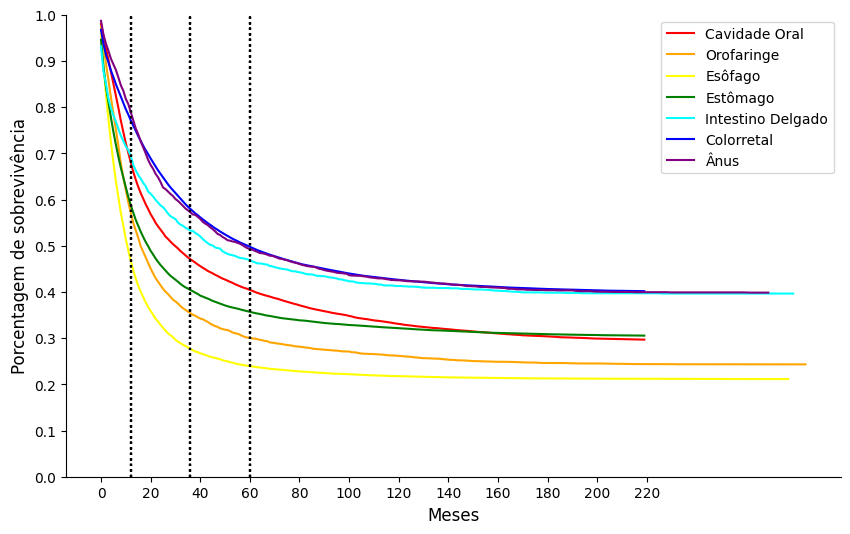

In [33]:
plot_survs([df_boca, df_oro, df_eso, df_esto, df_delg, df_colo, df_anus])

In [36]:
def plotly_survs(list_dfs):
    """
    """
    fig = go.Figure()

    for i, df in enumerate(list_dfs):

        df_aux = df.copy()
        nomes = ['Cavidade Oral', 'Orofaringe', 'Esôfago', 'Estômago', 'Intestino Delgado', 'Colorretal', 'Ânus']
        df_aux['meses_trat'] = (df_aux['ULTITRAT']/30).round()
        df_aux = (df_aux.groupby(by=['meses_trat'])['obito_geral'].sum()/df_aux.shape[0]).reset_index()

        soma = 1
        val = df_aux['obito_geral'].values.copy()
        for j in range(df_aux.shape[0]):
            soma -= df_aux.obito_geral[j]
            val[j] = soma

        df_aux['perc'] = val
        df_aux = df_aux[df_aux.meses_trat >= 0]

        fig.add_trace(go.Scatter(x = df_aux.meses_trat[:220],
                                 y = df_aux.perc[:220],
                                 name = nomes[i]))

        fig.update_layout(yaxis_title='Porcentagem de Sobrevivência',
                          xaxis_title='Meses', xaxis = dict(tickmode = 'linear',
                                                            tick0=0,
                                                            dtick=20)
                          )
    fig.add_vline(x=12, line_dash='dot', annotation_text='1 Ano',
                  annotation_position='bottom right')
    fig.add_vline(x=36, line_dash='dot', annotation_text='3 Anos',
                  annotation_position='bottom right')
    fig.add_vline(x=60, line_dash='dot', annotation_text='5 Anos',
                  annotation_position='bottom right')
    fig.show()

In [37]:
plotly_survs([df_boca, df_oro, df_eso, df_esto, df_delg, df_colo, df_anus])